<a href="https://colab.research.google.com/github/Asnarck7/Login_Docker/blob/main/RedesSocialesAnalicisDeCrecimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pyngrok

In [ ]:
from flask import Flask
from pyngrok import ngrok

# Configura el token de autenticación para ngrok
ngrok.set_auth_token("2o7I7SA0YOCbI6ZfiZHlwDSSfd3_6D3gc7JHRKQAjhipUirQU")

# Crea la aplicación Flask
app = Flask(__name__)

# Definir la ruta principal
@app.route("/")
def home():
    return "<h1>Welcome to CID</h1>"

# Ejecutar la aplicación
if __name__ == '__main__':
    # Conectar ngrok al puerto 5000
    public_url = ngrok.connect(5000)
    print(f" * ngrok tunnel URL: {public_url}")
    # Ejecutar la aplicación Flask en el puerto 5000
    app.run(port=5000)

 * ngrok tunnel URL: NgrokTunnel: "https://be7f-34-86-104-121.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Oct/2024 21:42:51] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Oct/2024 21:42:51] "GET /favicon.ico HTTP/1.1" 404 -


<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Análisis de Redes Sociales 2004-2024</title>
</head>
<body>
    <h1>Análisis de la Evolución en el Uso de Redes Sociales: 2004-2024</h1>
    <p class="description">
        Este análisis explora el crecimiento y las tendencias de uso de diversas redes sociales populares, incluyendo
        Facebook, Twitter y YouTube, desde el año 2004 hasta el 2024. Se observan cambios en la preferencia de los usuarios,
        identificando cuáles plataformas muestran un crecimiento sostenido y cuáles han disminuido en popularidad.
        Los datos analizados ayudan a comprender el comportamiento digital de los usuarios a lo largo del tiempo y
        proporcionan insights sobre el impacto de las redes sociales en la vida cotidiana.
    </p>
</body>
</html>


<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>1. Importar Librerías Necesarias</h2>

In [ ]:
# Importa las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>2. Cargar los Datos desde Excel Sube</h2>
    <body>
    <h1>Análisis de la Evolución en el Uso de Redes Sociales: 2010-2024</h1>
    <p class="description">
    Subiremos el archivo RedesSociales_2010_2024.xlsx a Google Colab y asegúrate de que esté en el mismo directorio en el que trabajas.
    </p>
</body>

In [ ]:
# Cargar datos desde un archivo Excel
file_path = '/content/RedesSociales_2004_2024.xlsx'  # Ruta del archivo cargado en Google Colab
df = pd.read_excel(file_path)

Mostrar las primeras filas para asegurarnos de que los datos se cargaron correctamente

In [ ]:
df.head()

Año Red Social  Uso (%)  Penetración (13-17) (%)  Penetración (18-24) (%)  \
0  2004   Facebook      0.0                      0.0                      0.0   
1  2005    YouTube      0.0                      0.0                      0.0   
2  2006    Twitter      0.0                      0.0                      0.0   
3  2007   Facebook      5.0                     10.0                     12.0   
4  2007    YouTube     10.0                     12.0                     18.0   

   Penetración (25-34) (%)\t  Penetración (35-44) (%)  Penetración (45+) (%)  \
0                        0.0                      0.0                    0.0   
1                        0.0                      0.0                    0.0   
2                        0.0                      0.0                    0.0   
3                        8.0                      4.0                    2.0   
4                       14.0                      8.0                    4.0   

   Duración Promedio Diario (min)  Tasa de Abandono (%)  \
0                               0                   0.0   
1                               0                   0.0   
2                               0                   0.0   
3                              15                   0.0   
4                              20                   0.0   

   Usuarios Activos (Millones)  Frecuencia de Uso (Sesiones/día)  \
0                            0                               0.0   
1                            0                               0.0   
2                            0                               0.0   
3                           20                               1.0   
4                           50                               1.5   

   Ingresos Anuales (Millones USD)  Costo de Adquisición (USD)\t  \
0                                0                           0.0   
1                                0                           0.0   
2                                0                           0.0   
3                                0                           0.0   
4                               50                           2.0   

   Índice de Satisfacción (%)\t  Descargas Anuales (Millones)\t  \
0                             0                             0.0   
1                             0                             0.0   
2                             0                             0.0   
3                             0                             0.0   
4                            85                            30.0   

   Contenido Generado (%)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                    70.0

In [ ]:
df.shape

(104, 19)

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>3. Explorar los Datos </h2>
    <body>
    <p class="description">
    Observa la estructura y tipos de datos para identificar posibles valores nulos o anomalías.
    </p>
</body>

In [ ]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               105 non-null    int64  
 1   Red Social                        105 non-null    object 
 2   Uso (%)                           105 non-null    float64
 3   Penetración (13-17) (%)           105 non-null    float64
 4   Penetración (18-24) (%)           105 non-null    float64
 5   Penetración (25-34) (%)	          105 non-null    float64
 6   Penetración (35-44) (%)           105 non-null    float64
 7   Penetración (45+) (%)             105 non-null    float64
 8   Duración Promedio Diario (min)    105 non-null    int64  
 9   Tasa de Abandono (%)              105 non-null    float64
 10  Usuarios Activos (Millones)       105 non-null    int64  
 11  Frecuencia de Uso (Sesiones/día)  105 non-null    float64
 12  Ingresos

In [ ]:
# Resumen estadístico para revisar distribuciones y detectar valores fuera de rango
df.describe()

Año     Uso (%)  Penetración (13-17) (%)  \
count   105.000000  105.000000               105.000000   
mean   2016.295238   37.132381                33.395238   
std       5.273161   21.316550                21.507295   
min    2004.000000    0.000000                 0.000000   
25%    2012.000000   20.000000                15.000000   
50%    2017.000000   40.000000                30.500000   
75%    2021.000000   55.000000                52.000000   
max    2024.000000   68.500000                69.500000   

       Penetración (18-24) (%)  Penetración (25-34) (%)\t  \
count               105.000000                 105.000000   
mean                 52.219048                  34.229524   
std                  26.951980                  19.644181   
min                   0.000000                   0.000000   
25%                  30.000000                  19.000000   
50%                  57.000000                  36.500000   
75%                  75.000000                  50.000000   
max                  90.500000                  67.500000   

       Penetración (35-44) (%)  Penetración (45+) (%)  \
count               105.000000             105.000000   
mean                 21.508571              11.740000   
std                  13.749644               8.328053   
min                   0.000000               0.000000   
25%                  10.000000               5.000000   
50%                  22.000000              12.000000   
75%                  31.000000              17.000000   
max                  48.000000              30.000000   

       Duración Promedio Diario (min)  Tasa de Abandono (%)  \
count                      105.000000            105.000000   
mean                        38.114286              2.555238   
std                         19.467090              1.271657   
min                          0.000000              0.000000   
25%                         25.000000              2.000000   
50%                         36.000000              2.600000   
75%                         52.000000              3.400000   
max                         75.000000              5.000000   

       Usuarios Activos (Millones)  Frecuencia de Uso (Sesiones/día)  \
count                   105.000000                        105.000000   
mean                    773.295238                          3.817143   
std                     565.556617                          1.704037   
min                       0.000000                          0.000000   
25%                     300.000000                          3.000000   
50%                     800.000000                          4.000000   
75%                    1100.000000                          5.000000   
max                    2100.000000                          7.000000   

       Ingresos Anuales (Millones USD)  Costo de Adquisición (USD)\t  \
count                       105.000000                    105.000000   
mean                       3118.000000                      2.964762   
std                        2400.160812                      1.312439   
min                           0.000000                      0.000000   
25%                        1000.000000                      2.300000   
50%                        3000.000000                      3.200000   
75%                        4700.000000                      4.000000   
max                        9000.000000                      5.000000   

       Índice de Satisfacción (%)\t  Descargas Anuales (Millones)\t  \
count                    105.000000                      104.000000   
mean                      76.200000                      654.807692   
std                       25.465437                      388.064605   
min                        0.000000                        0.000000   
25%                       78.000000                      400.000000   
50%                       84.000000                      700.000000   
75%                       88.000000                     

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>4. Configuracion Grafica</h2>
    <body>
    <p class="description">
    Configura el estilo de las gráficas usando seaborn para que todas las visualizaciones tengan un diseño uniforme.
    </p>
</body>

In [ ]:
# Configuración de estilo de gráficos
sns.set_theme(style="whitegrid")

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>5.  Carga y Limpieza de Datos</h2>
    <body>
    <p class="description">
    Esta función carga el archivo Excel y realiza una limpieza inicial de datos, eliminando filas con valores nulos y espacios en los nombres de columnas.
    </p>
</body>

In [ ]:
def cargar_datos(file_path):
    """Carga y limpia el archivo Excel, verificando la existencia de columnas clave."""
    try:
        df = pd.read_excel(file_path)
        # Verificar si las columnas clave están en el DataFrame
        columnas_requeridas = ['Año', 'Red Social', 'Uso (%)']
        if not all(col in df.columns for col in columnas_requeridas):
            print("Error: Falta alguna de las columnas clave en el archivo.")
            return None
        # Eliminar filas con valores nulos
        df.dropna(inplace=True)
        # Limpiar nombres de columnas eliminando espacios y caracteres no deseados
        df.columns = df.columns.str.strip().str.replace('\t', '', regex=False)
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en la ruta {file_path}")
        return None

    return df

# Cargar los datos
file_path = '/content/RedesSociales_2004_2024.xlsx'
df = cargar_datos(file_path)
df.head()

Año Red Social  Uso (%)  Penetración (13-17) (%)  Penetración (18-24) (%)  \
0  2004   Facebook      0.0                      0.0                      0.0   
1  2005    YouTube      0.0                      0.0                      0.0   
2  2006    Twitter      0.0                      0.0                      0.0   
3  2007   Facebook      5.0                     10.0                     12.0   
4  2007    YouTube     10.0                     12.0                     18.0   

   Penetración (25-34) (%)  Penetración (35-44) (%)  Penetración (45+) (%)  \
0                      0.0                      0.0                    0.0   
1                      0.0                      0.0                    0.0   
2                      0.0                      0.0                    0.0   
3                      8.0                      4.0                    2.0   
4                     14.0                      8.0                    4.0   

   Duración Promedio Diario (min)  Tasa de Abandono (%)  \
0                               0                   0.0   
1                               0                   0.0   
2                               0                   0.0   
3                              15                   0.0   
4                              20                   0.0   

   Usuarios Activos (Millones)  Frecuencia de Uso (Sesiones/día)  \
0                            0                               0.0   
1                            0                               0.0   
2                            0                               0.0   
3                           20                               1.0   
4                           50                               1.5   

   Ingresos Anuales (Millones USD)  Costo de Adquisición (USD)  \
0                                0                         0.0   
1                                0                         0.0   
2                                0                         0.0   
3                                0                         0.0   
4                               50                         2.0   

   Índice de Satisfacción (%)  Descargas Anuales (Millones)  \
0                           0                           0.0   
1                           0                           0.0   
2                           0                           0.0   
3                           0                           0.0   
4                          85                          30.0   

   Contenido Generado (%)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                    70.0

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>6 Transformación y Cálculo de Crecimiento Anual y Acumulado</h2>
    <body>
    <p class="description">
    Convierte los porcentajes de uso a proporciones y calcula el crecimiento porcentual año a año y el crecimiento acumulado para cada red social.
    </p>
</body>

In [ ]:
def transformar_datos(df):
    """Convierte porcentajes a proporciones y calcula el crecimiento anual y acumulado."""
    if 'Uso (%)' in df.columns and 'Red Social' in df.columns:
        # Verificar si la columna 'Uso (%)' ya está en proporciones
        if df['Uso (%)'].max() > 1:
            df['Uso (%)'] = df['Uso (%)'] / 100  # Convertir a proporciones

        # Calcular crecimiento anual
        df['Crecimiento (%)'] = df.groupby('Red Social')['Uso (%)'].pct_change() * 100

        # Calcular crecimiento acumulado asegurando la alineación con el índice original
        acumulado = df.groupby('Red Social')['Uso (%)'].transform(lambda x: (x / x.iloc[0] - 1) * 100)
        df['Crecimiento Acumulado (%)'] = acumulado

    else:
        print("Error: Las columnas 'Uso (%)' o 'Red Social' no están en el DataFrame.")

    return df

# Aplicar la función para transformar los datos
df = transformar_datos(df)
df.head()

Año Red Social  Uso (%)  Penetración (13-17) (%)  Penetración (18-24) (%)  \
0  2004   Facebook   0.0000                      0.0                      0.0   
1  2005    YouTube   0.0000                      0.0                      0.0   
2  2006    Twitter   0.0000                      0.0                      0.0   
3  2007   Facebook   0.0005                     10.0                     12.0   
4  2007    YouTube   0.0010                     12.0                     18.0   

   Penetración (25-34) (%)  Penetración (35-44) (%)  Penetración (45+) (%)  \
0                      0.0                      0.0                    0.0   
1                      0.0                      0.0                    0.0   
2                      0.0                      0.0                    0.0   
3                      8.0                      4.0                    2.0   
4                     14.0                      8.0                    4.0   

   Duración Promedio Diario (min)  Tasa de Abandono (%)  \
0                               0                   0.0   
1                               0                   0.0   
2                               0                   0.0   
3                              15                   0.0   
4                              20                   0.0   

   Usuarios Activos (Millones)  Frecuencia de Uso (Sesiones/día)  \
0                            0                               0.0   
1                            0                               0.0   
2                            0                               0.0   
3                           20                               1.0   
4                           50                               1.5   

   Ingresos Anuales (Millones USD)  Costo de Adquisición (USD)  \
0                                0                         0.0   
1                                0                         0.0   
2                                0                         0.0   
3                                0                         0.0   
4                               50                         2.0   

   Índice de Satisfacción (%)  Descargas Anuales (Millones)  \
0                           0                           0.0   
1                           0                           0.0   
2                           0                           0.0   
3                           0                           0.0   
4                          85                          30.0   

   Contenido Generado (%)  Crecimiento (%)  Crecimiento Acumulado (%)  
0                     0.0              NaN                        NaN  
1                     0.0              NaN                        NaN  
2                     0.0              NaN                        NaN  
3                     0.0              inf                        inf  
4                    70.0              inf                        inf

In [ ]:
df.dropna()

Año Red Social  Uso (%)  Penetración (13-17) (%)  \
3    2007   Facebook   0.0005                     10.0   
4    2007    YouTube   0.0010                     12.0   
5    2007    Twitter   0.0002                      0.0   
6    2008   Facebook   0.0010                     20.0   
7    2008    YouTube   0.0015                     15.0   
..    ...        ...      ...                      ...   
100  2024    YouTube   0.0067                     66.0   
101  2024  Instagram   0.0068                     37.5   
102  2024   WhatsApp   0.0056                     31.0   
103  2024   Snapchat   0.0033                     18.0   
104  2024     TikTok   0.0055                     32.0   

     Penetración (18-24) (%)  Penetración (25-34) (%)  \
3                       12.0                      8.0   
4                       18.0                     14.0   
5                       10.0                      4.0   
6                       25.0                     15.0   
7                       20.0                     15.0   
..                       ...                      ...   
100                     85.0                     62.5   
101                     70.0                     41.5   
102                     57.0                     42.0   
103                     34.0                     25.0   
104                     60.0                     27.0   

     Penetración (35-44) (%)  Penetración (45+) (%)  \
3                        4.0                    2.0   
4                        8.0                    4.0   
5                        0.0                    0.0   
6                        8.0                    5.0   
7                       10.0                    5.0   
..                       ...                    ...   
100                     48.0                   30.0   
101                     31.0                   21.0   
102                     29.0                   18.5   
103                     15.0                    6.5   
104                     16.0                    8.0   

     Duración Promedio Diario (min)  Tasa de Abandono (%)  \
3                                15                   0.0   
4                                20                   0.0   
5                                10                   0.0   
6                                30                   5.0   
7                                25                   5.0   
..                              ...                   ...   
100                              75                   1.2   
101                              56                   1.9   
102                              69                   2.1   
103                              35                   2.0   
104                              62                   1.2   

     Usuarios Activos (Millones)  Frecuencia de Uso (Sesiones/día)  \
3                             20                               1.0   
4                             50                               1.5   
5                              1                               1.0   
6                            100                               2.0   
7                            100                               1.8   
..                           ...                               ...   
100                         2100                               7.0   
101                         1200                               4.4   
102                         1000                               4.9   
103                          850                               3.6   
104                         1000                               5.0   

     Ingresos Anuales (Millones USD)  Costo de Adquisición (USD)  \
3                                  0                         0.0   
4                                 50                         2.0   
5                                  0                         0.0   
6                                250                         4.0   
7                                120             

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>7.  Visualización del Crecimiento Acumulado (2004-2024)</h2>
    <body>
    <p class="description">
    Genera un gráfico de línea para visualizar el crecimiento acumulado de cada red social en el periodo 2004-2024.
    </p>
</body>

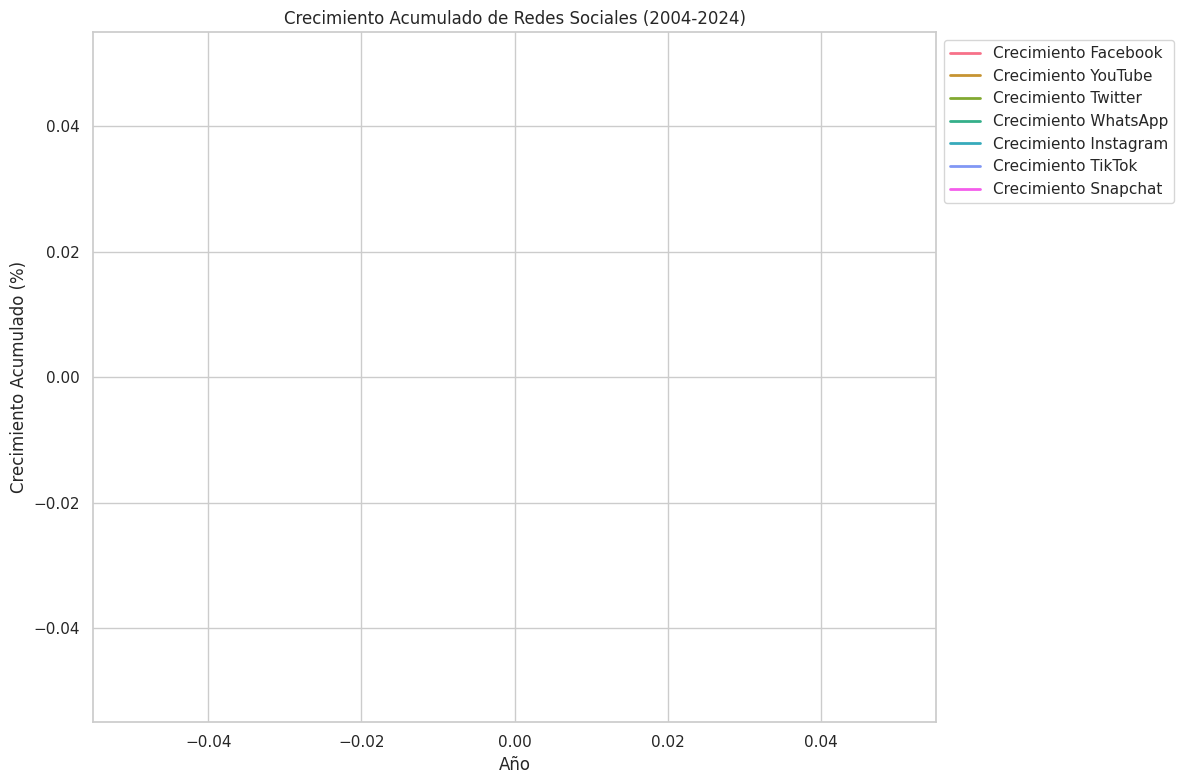

In [ ]:
# Limpiar datos para asegurarse de que no haya valores nulos en 'Red Social'
df = df[df['Red Social'].notna()]

def visualizar_crecimiento(df):
    """Genera un gráfico de línea mostrando el crecimiento acumulado de cada red social con mejoras de visibilidad."""
    redes = df['Red Social'].unique()
    plt.figure(figsize=(12, 8))

    # Paleta de colores para diferenciar cada red social
    colores = sns.color_palette("husl", len(redes))

    for i, red in enumerate(redes):
        df_red = df[df['Red Social'] == red]

        # Asegurarse de que haya suficientes datos para calcular el crecimiento
        if df_red['Crecimiento Acumulado (%)'].notnull().any():
            plt.plot(df_red['Año'], df_red['Crecimiento Acumulado (%)'], label=f'Crecimiento {red}',
                     color=colores[i], linewidth=2)  # Ajusta color y grosor de la línea

            # Anotaciones solo si hay datos válidos para el cálculo del máximo
            max_growth_idx = df_red['Crecimiento Acumulado (%)'].idxmax()
            max_growth_value = df_red['Crecimiento Acumulado (%)'].max()
            if not pd.isnull(max_growth_value):
                plt.annotate(f'{max_growth_value:.2f}%',
                             (df_red['Año'].loc[max_growth_idx], max_growth_value),
                             textcoords="offset points", xytext=(0,10), ha='center', color=colores[i])

    plt.title('Crecimiento Acumulado de Redes Sociales (2004-2024)')
    plt.xlabel('Año')
    plt.ylabel('Crecimiento Acumulado (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Coloca la leyenda fuera del gráfico para mejor visibilidad
    plt.grid(True)
    plt.tight_layout()  # Ajuste automático para evitar solapamiento
    plt.show()

# Llamada a la función con el DataFrame limpio
visualizar_crecimiento(df)


<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>8.  Comparación del Uso de Redes Sociales en el Último Año Disponible</h2>
    <body>
    <p class="description">
    Genera una tabla comparativa en un gráfico de barras para ver el porcentaje de uso de cada red social en el año más reciente disponible
    </p>
</body>

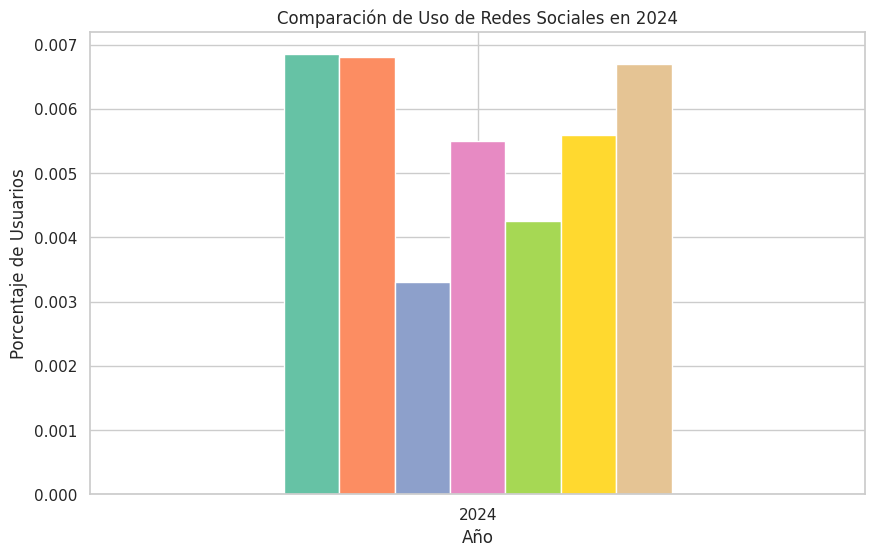

In [ ]:
def comparar_uso_ultimo_anio(df):
    """Grafica el uso de redes sociales en el último año disponible."""
    ultimo_anio = df['Año'].max()
    uso_ultimo_anio = df[df['Año'] == ultimo_anio].pivot(index='Red Social', columns='Año', values='Uso (%)')

    uso_ultimo_anio.T.plot(kind='bar', legend=False, figsize=(10, 6), color=sns.color_palette("Set2"))
    plt.title(f'Comparación de Uso de Redes Sociales en {ultimo_anio}')
    plt.ylabel('Porcentaje de Usuarios')
    plt.xticks(rotation=0)
    plt.grid(True)
    plt.show()

comparar_uso_ultimo_anio(df)

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>9.  Predicción del Número de Usuarios para Cada Red Social hasta 2030</h2>
    <body>
    <p class="description">
    Usa un modelo de regresión lineal para hacer una predicción del crecimiento de usuarios activos hasta el año 2030.
    </p>
</body>

In [ ]:
def prediccion_usuarios(df, anio_inicio=2025, anio_fin=2030):
    """Predice el crecimiento de usuarios para cada red social hasta 2030."""
    redes = df['Red Social'].unique()
    predicciones = pd.DataFrame()

    for red in redes:
        df_red = df[df['Red Social'] == red][['Año', 'Usuarios Activos (Millones)']].dropna()
        X = df_red[['Año']]
        y = df_red['Usuarios Activos (Millones)']

        # Modelo de regresión lineal
        modelo = LinearRegression()
        modelo.fit(X, y)

        # Generar predicciones para años futuros
        anios_futuros = np.array(range(anio_inicio, anio_fin + 1)).reshape(-1, 1)
        prediccion = modelo.predict(anios_futuros)

        # Crear DataFrame con predicciones
        prediccion_df = pd.DataFrame({'Año': anios_futuros.flatten(), 'Usuarios Activos (Millones)': prediccion})
        prediccion_df['Red Social'] = red
        predicciones = pd.concat([predicciones, prediccion_df], ignore_index=True)

    return predicciones

predicciones = prediccion_usuarios(df)
print(predicciones)

     Año  Usuarios Activos (Millones) Red Social
0   2025                  2222.568617   Facebook
1   2026                  2331.989470   Facebook
2   2027                  2441.410323   Facebook
3   2028                  2550.831176   Facebook
4   2029                  2660.252028   Facebook
5   2030                  2769.672881   Facebook
6   2025                  2300.866845    YouTube
7   2026                  2418.230563    YouTube
8   2027                  2535.594281    YouTube
9   2028                  2652.957998    YouTube
10  2029                  2770.321716    YouTube
11  2030                  2887.685433    YouTube
12  2025                  1516.052632    Twitter
13  2026                  1597.784211    Twitter
14  2027                  1679.515789    Twitter
15  2028                  1761.247368    Twitter
16  2029                  1842.978947    Twitter
17  2030                  1924.710526    Twitter
18  2025                  1117.179376   WhatsApp
19  2026            

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <h2>10. Visualización de la Predicción de Crecimiento de Usuarios hasta 2030</h2>
    <body>
    <p class="description">
    Genera un gráfico de línea para mostrar la predicción de crecimiento de usuarios activos para cada red social hasta el 2030, comparando datos históricos y proyectados.
    </p>
</body>

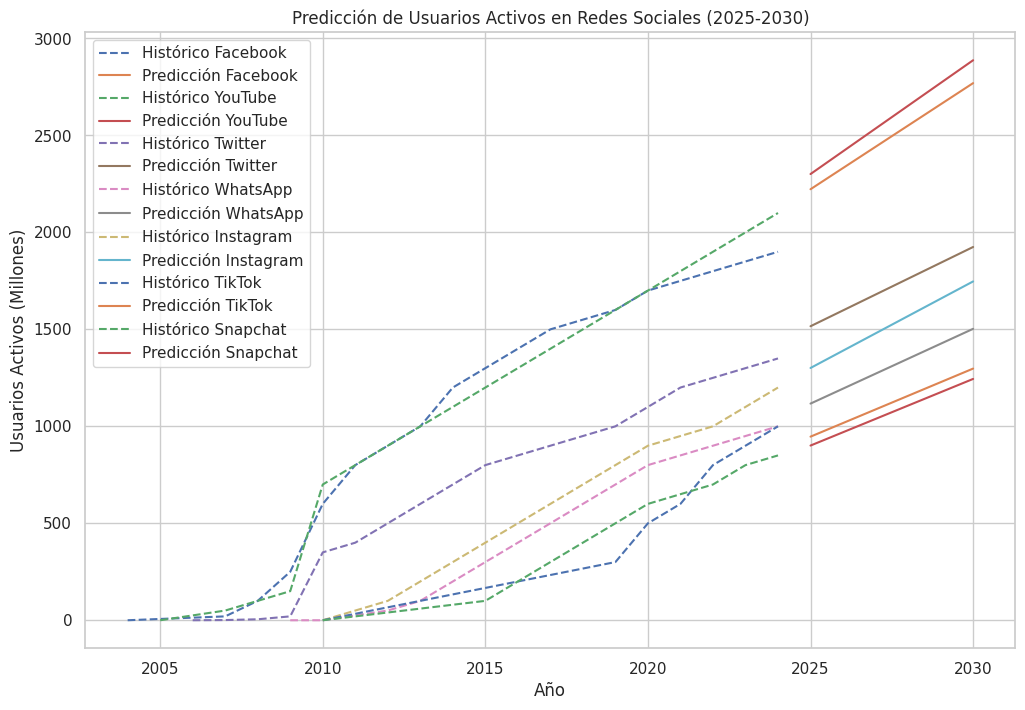

In [ ]:
def visualizar_prediccion(predicciones, df):
    """Genera un gráfico de la predicción de usuarios activos hasta 2030 para cada red social."""
    redes = df['Red Social'].unique()
    plt.figure(figsize=(12, 8))

    for red in redes:
        df_red = df[df['Red Social'] == red]
        pred_red = predicciones[predicciones['Red Social'] == red]

        # Datos históricos
        plt.plot(df_red['Año'], df_red['Usuarios Activos (Millones)'], label=f'Histórico {red}', linestyle='--')

        # Predicción
        plt.plot(pred_red['Año'], pred_red['Usuarios Activos (Millones)'], label=f'Predicción {red}')

    plt.title('Predicción de Usuarios Activos en Redes Sociales (2025-2030)')
    plt.xlabel('Año')
    plt.ylabel('Usuarios Activos (Millones)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar la predicción
visualizar_prediccion(predicciones, df)

In [ ]:
# Cargar el archivo Excel
file_path = '/content/RedesSociales_2004_2024.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Mostrar DataFrame original
print("DataFrame original:")
print(df.head())  # Muestra las primeras filas del DataFrame

DataFrame original:
    Año Red Social  Uso (%)  Penetración (13-17) (%)  Penetración (18-24) (%)  \
0  2004   Facebook      0.0                      0.0                      0.0   
1  2005    YouTube      0.0                      0.0                      0.0   
2  2006    Twitter      0.0                      0.0                      0.0   
3  2007   Facebook      5.0                     10.0                     12.0   
4  2007    YouTube     10.0                     12.0                     18.0   

   Penetración (25-34) (%)\t  Penetración (35-44) (%)  Penetración (45+) (%)  \
0                        0.0                      0.0                    0.0   
1                        0.0                      0.0                    0.0   
2                        0.0                      0.0                    0.0   
3                        8.0                      4.0                    2.0   
4                       14.0                      8.0                    4.0   

   Duración 

In [ ]:
# Define las columnas a verificar según los nombres impresos
columns_to_check = [
    'Uso (%)',
    'Penetración (13-17) (%)',
    'Penetración (18-24) (%)',
    'Penetración (25-34) (%)',
    'Penetración (35-44) (%)',
    'Penetración (45+) (%)',
    'Duración Promedio Diario (min)',
    'Tasa de Abandono (%)',
    'Usuarios Activos (Millones)',
    'Frecuencia de Uso (Sesiones/día)',
    'Ingresos Anuales (Millones USD)',
    'Costo de Adquisición (USD)',
    'Índice de Satisfacción (%)',
    'Descargas Anuales (Millones)',
    'Contenido Generado (%)'
]

# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Eliminar filas con valores cero en las columnas especificadas
df_cleaned = df[(df[columns_to_check] != 0).any(axis=1)]

In [ ]:
# Mostrar DataFrame limpio
print("\nDataFrame después de eliminar filas con ceros:")
print(df_cleaned)


DataFrame después de eliminar filas con ceros:
      Año Red Social  Uso (%)  Penetración (13-17) (%)  \
3    2007   Facebook      5.0                     10.0   
4    2007    YouTube     10.0                     12.0   
5    2007    Twitter      2.0                      0.0   
6    2008   Facebook     10.0                     20.0   
7    2008    YouTube     15.0                     15.0   
..    ...        ...      ...                      ...   
100  2024    YouTube     67.0                     66.0   
101  2024  Instagram     68.0                     37.5   
102  2024   WhatsApp     56.0                     31.0   
103  2024   Snapchat     33.0                     18.0   
104  2024     TikTok     55.0                     32.0   

     Penetración (18-24) (%)  Penetración (25-34) (%)\t  \
3                       12.0                        8.0   
4                       18.0                       14.0   
5                       10.0                        4.0   
6                  

In [ ]:
# Gráfico para cada métrica
metrics = columns_to_check  # Usar las columnas filtradas

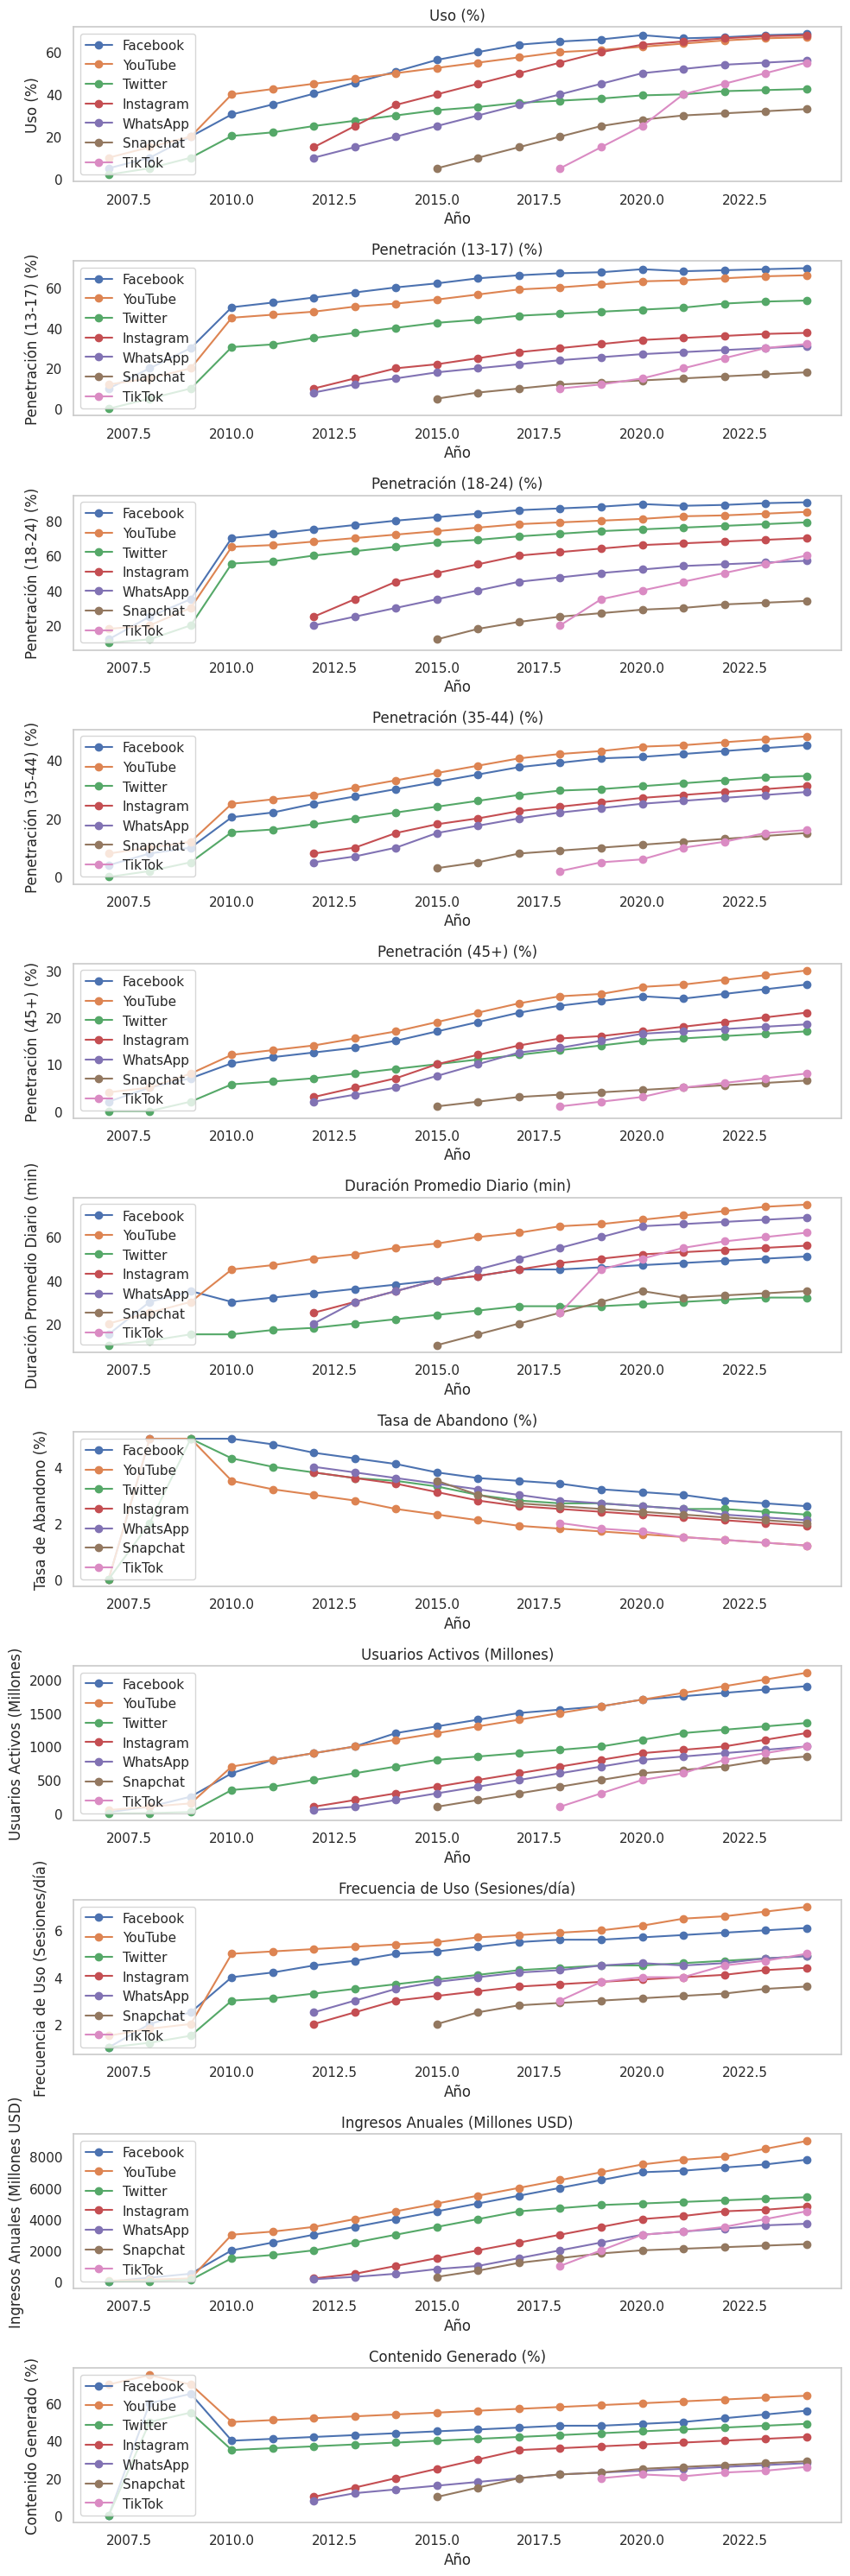

In [ ]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 30))

for ax, metric in zip(axes, metrics):
    for social in df_cleaned['Red Social'].unique():
        subset = df_cleaned[df_cleaned['Red Social'] == social]
        ax.plot(subset['Año'], subset[metric], marker='o', label=social)

    ax.set_title(metric)
    ax.set_xlabel('Año')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

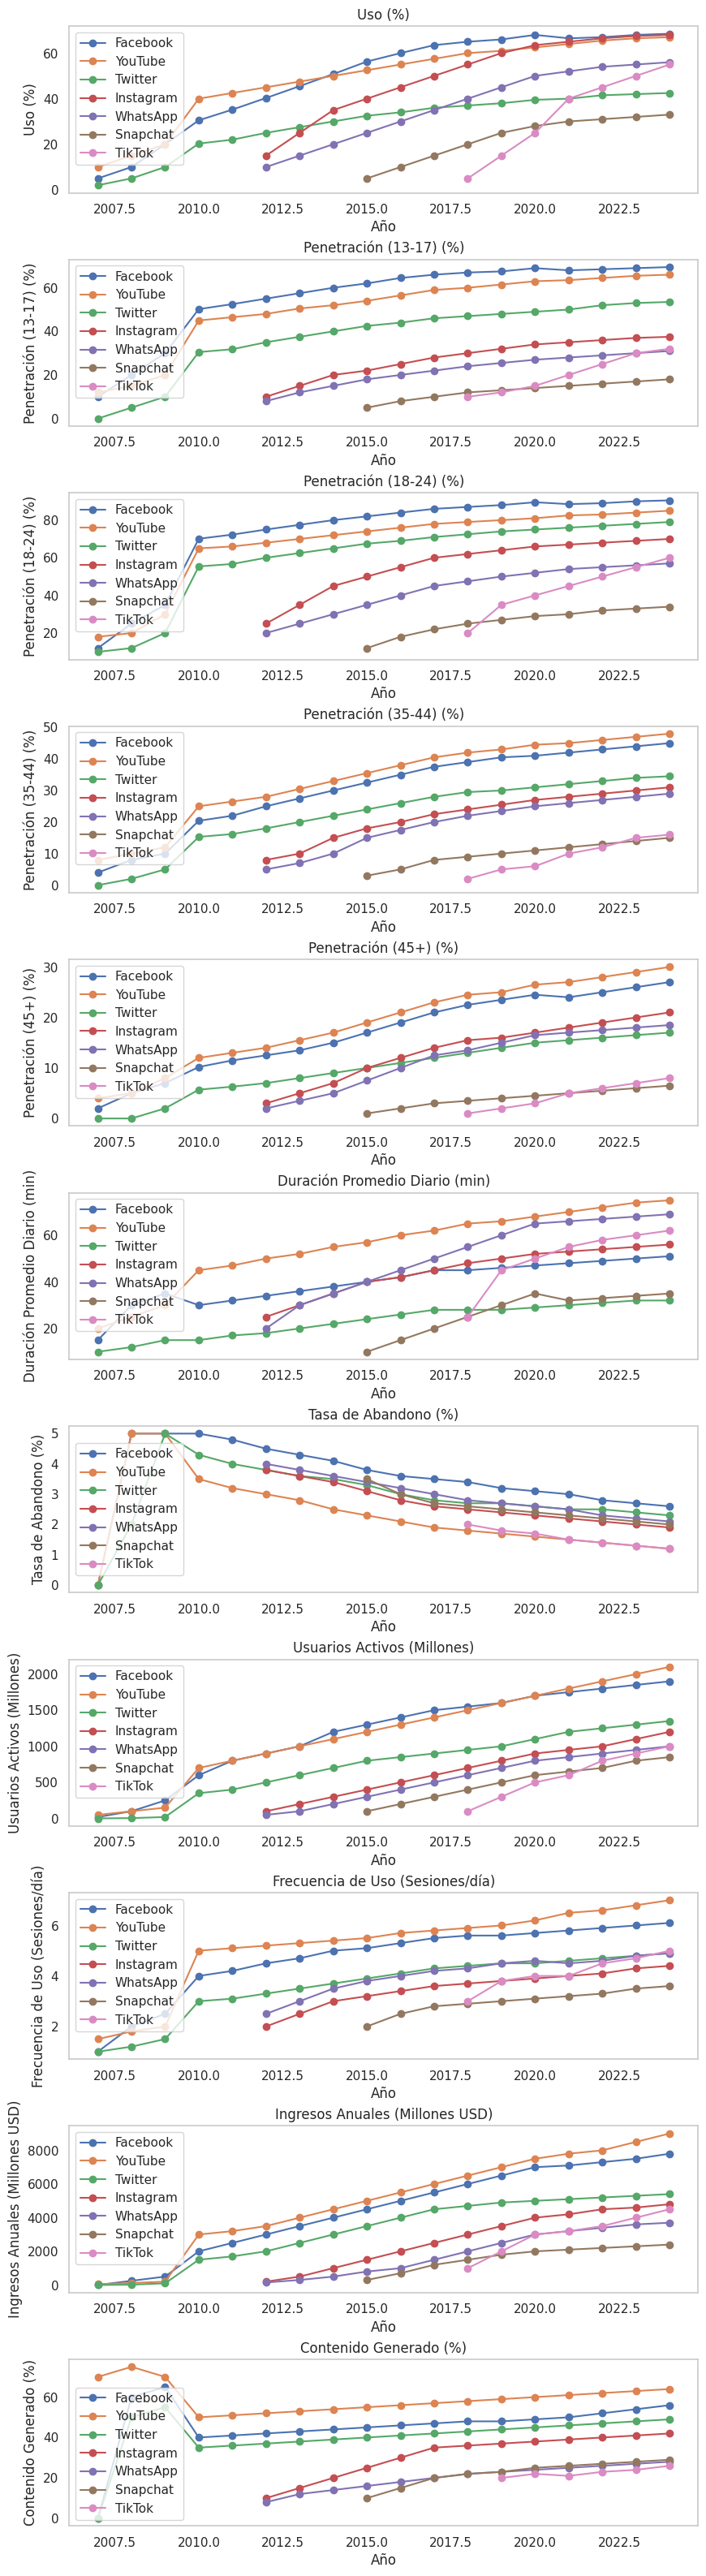

In [ ]:
# Crear subgráficos con un tamaño de figura más grande
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 40))  # Aumenta la altura de la figura

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.4)  # Aumenta el espacio entre los subgráficos

for ax, metric in zip(axes, metrics):
    for social in df_cleaned['Red Social'].unique():
        subset = df_cleaned[df_cleaned['Red Social'] == social]
        ax.plot(subset['Año'], subset[metric], marker='o', label=social)

    ax.set_title(metric)
    ax.set_xlabel('Año')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid()

plt.show()

In [ ]:
# Crear una tabla de matriz con melt
melted_df = df_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

In [ ]:
# Crear una tabla de matriz con melt
melted_df = df_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

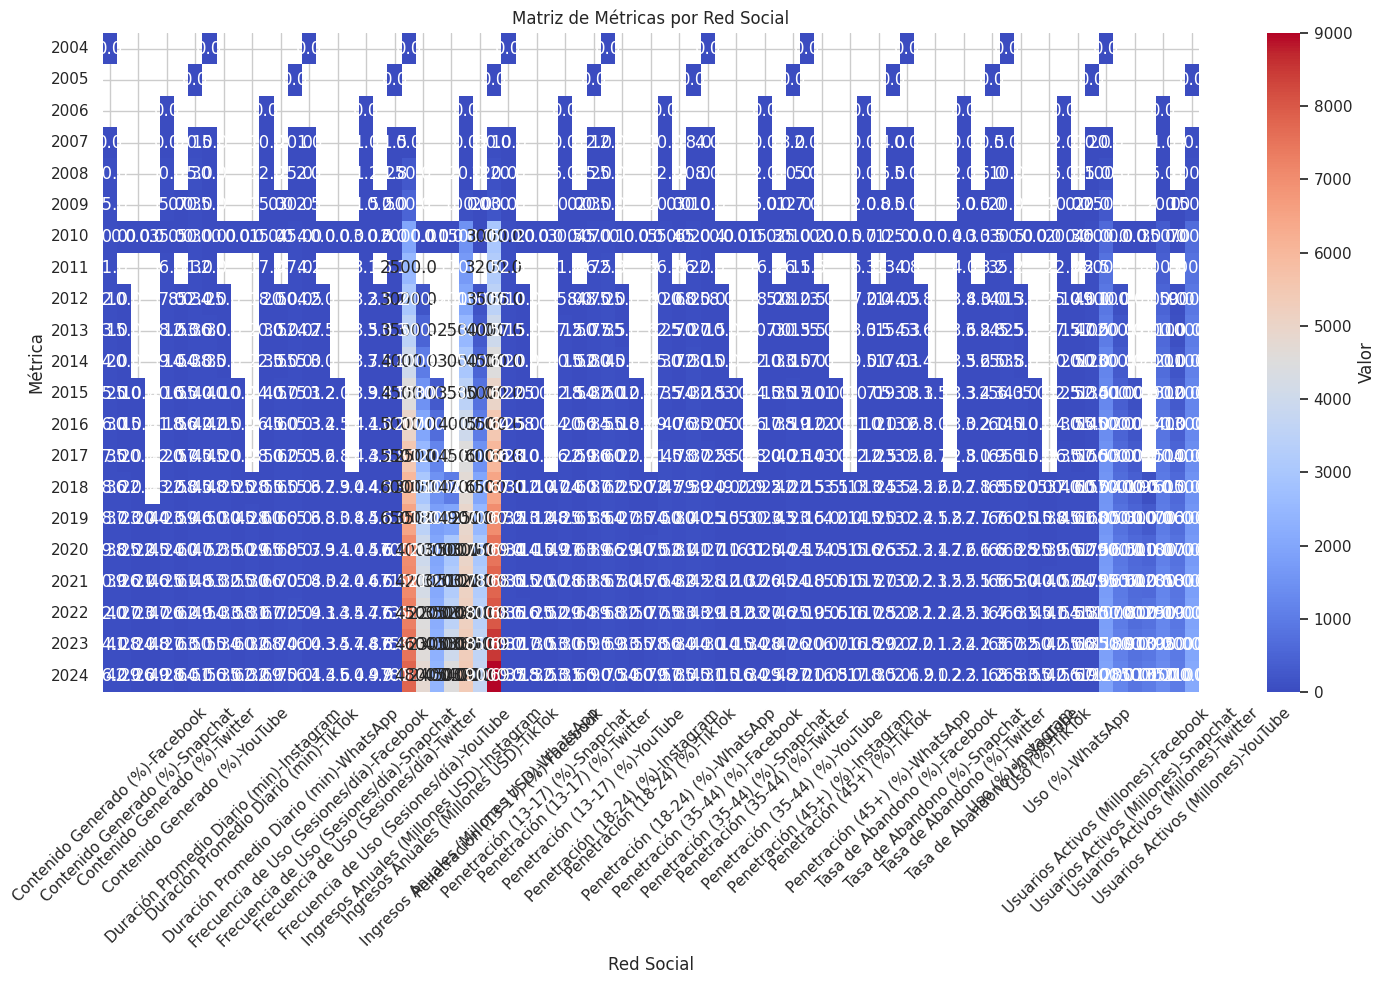

In [ ]:
# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas por Red Social')
plt.xlabel('Red Social')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Facebook**

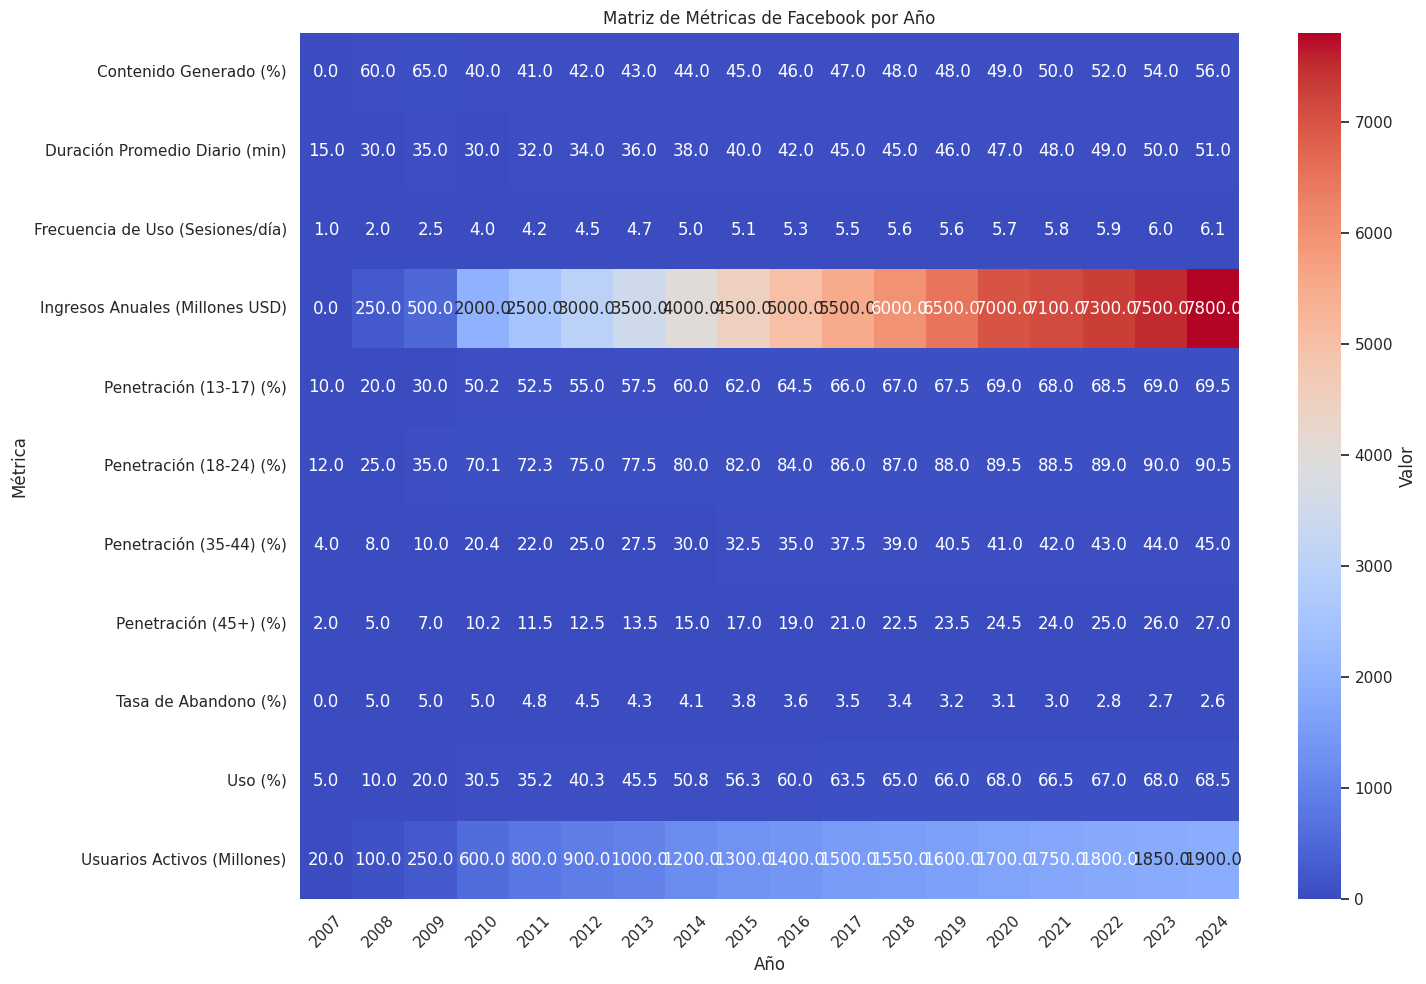

In [ ]:
# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Filtrar los datos para incluir solo Facebook
df_facebook = df[df['Red Social'] == 'Facebook']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_facebook_cleaned = df_facebook[(df_facebook[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_facebook_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de Facebook por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Instagram**

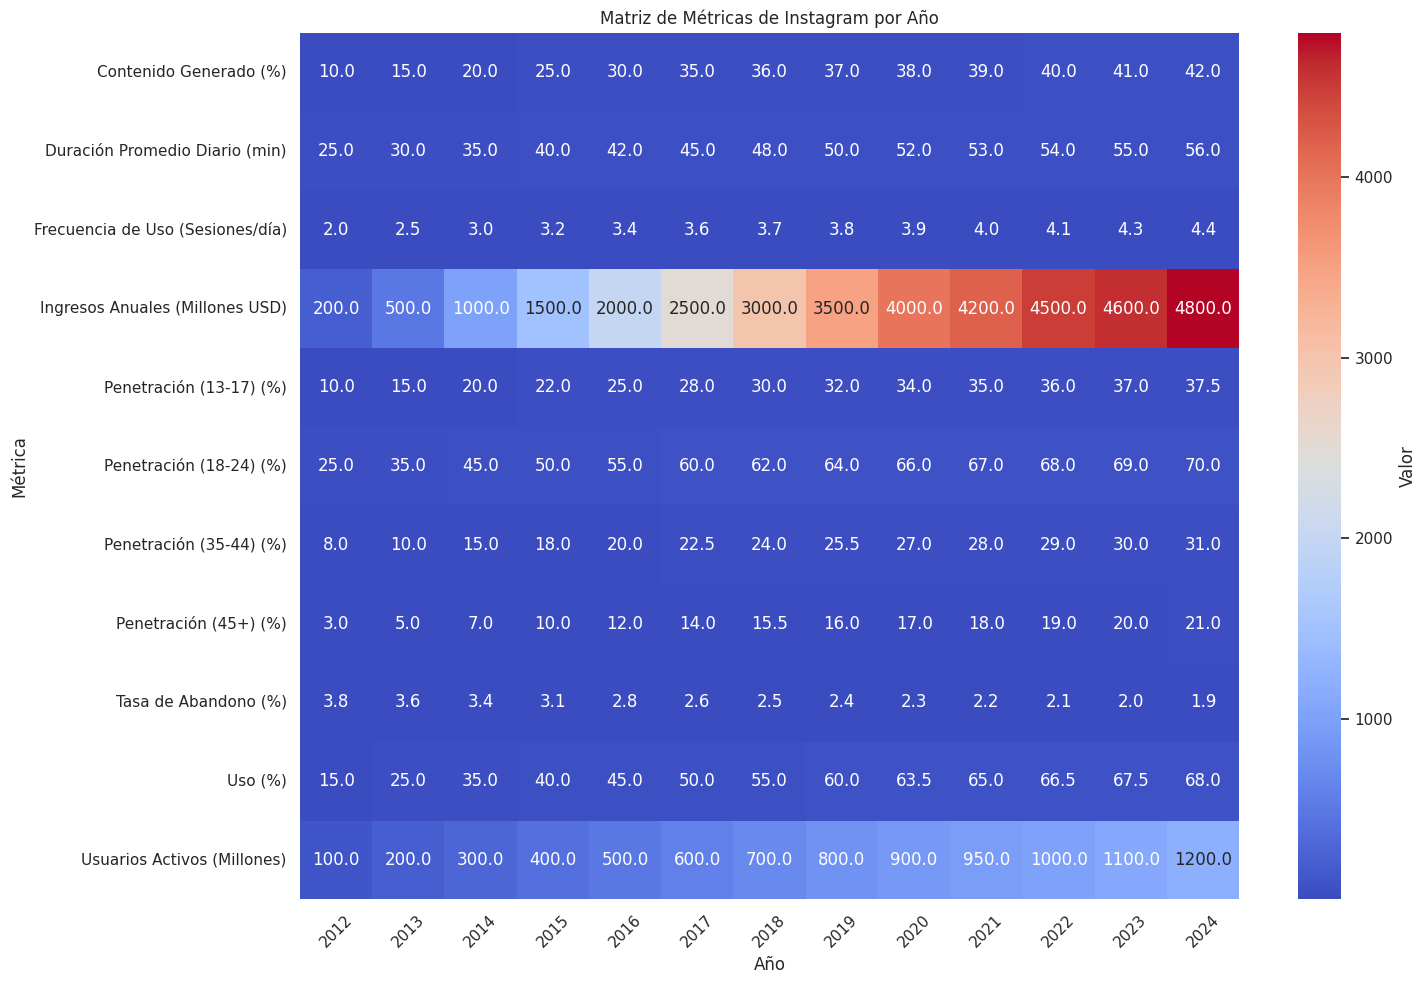

In [ ]:
# Filtrar los datos para incluir solo Instagram
df_instagram = df[df['Red Social'] == 'Instagram']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_instagram_cleaned = df_instagram[(df_instagram[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_instagram_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de Instagram por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Snapchat**

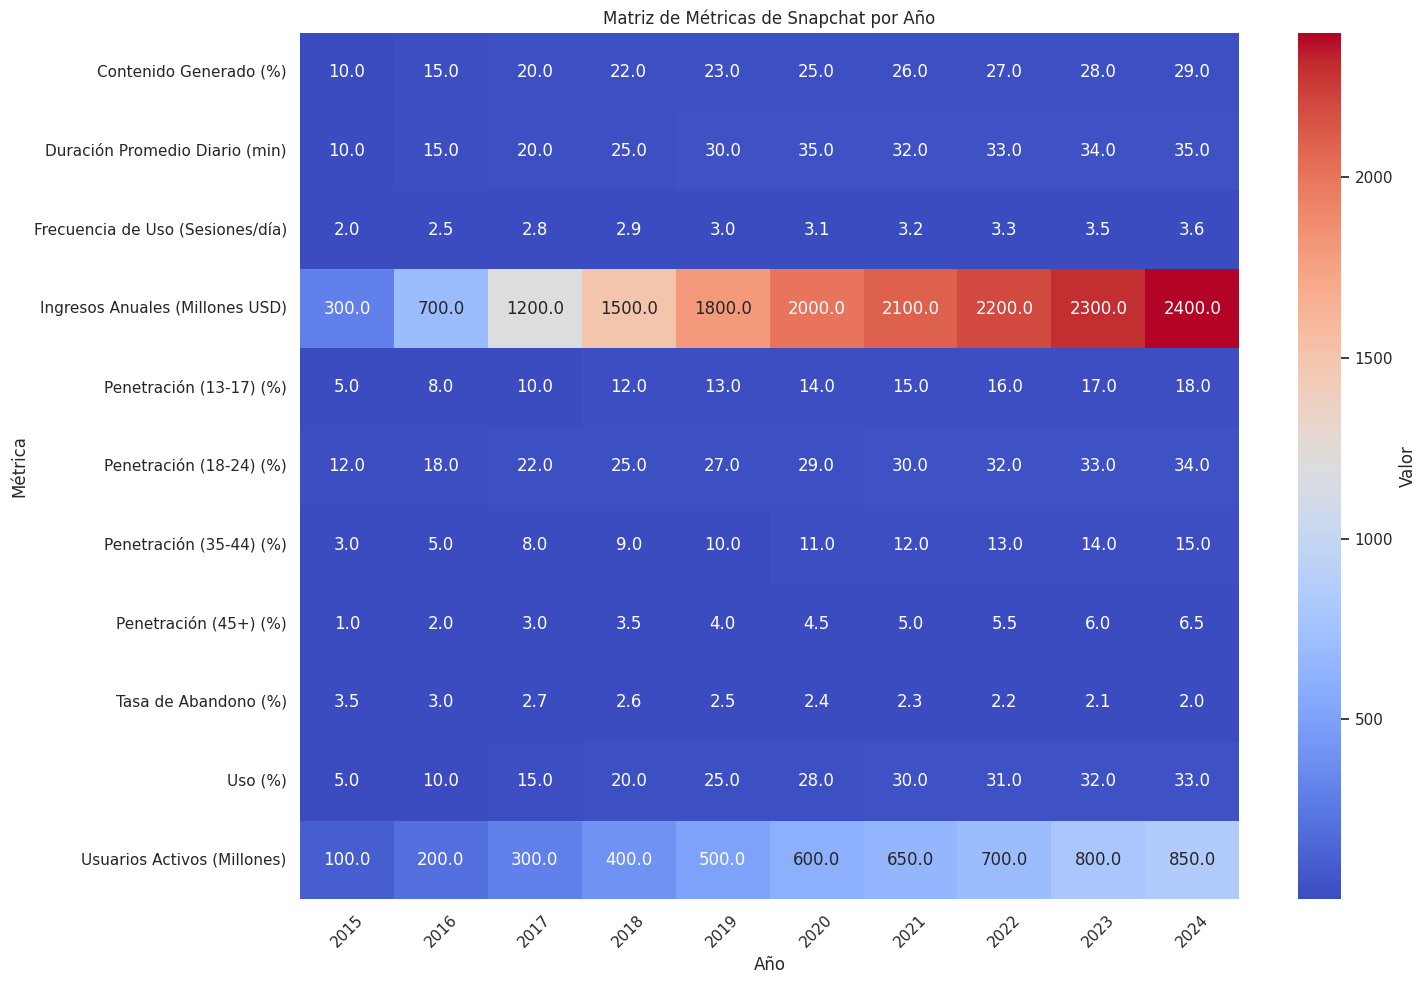

In [ ]:
# Filtrar los datos para incluir solo Snapchat
df_snapchat = df[df['Red Social'] == 'Snapchat']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_snapchat_cleaned = df_snapchat[(df_snapchat[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_snapchat_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de Snapchat por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **TikTok**

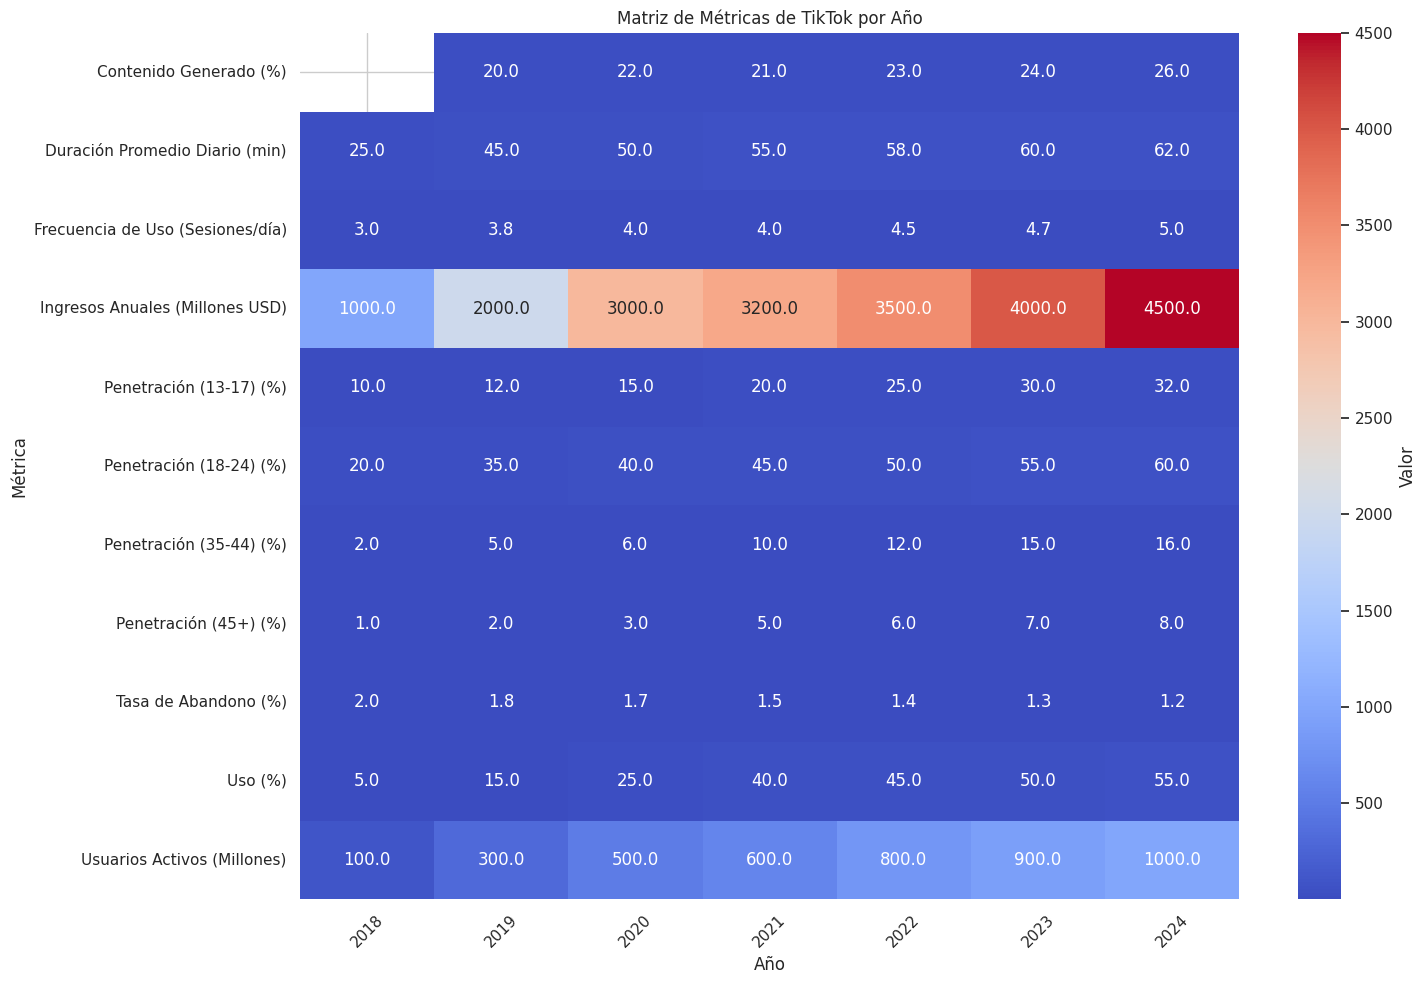

In [ ]:
# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Filtrar los datos para incluir solo TikTok
df_tiktok = df[df['Red Social'] == 'TikTok']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_tiktok_cleaned = df_tiktok[(df_tiktok[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_tiktok_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de TikTok por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Twitter**

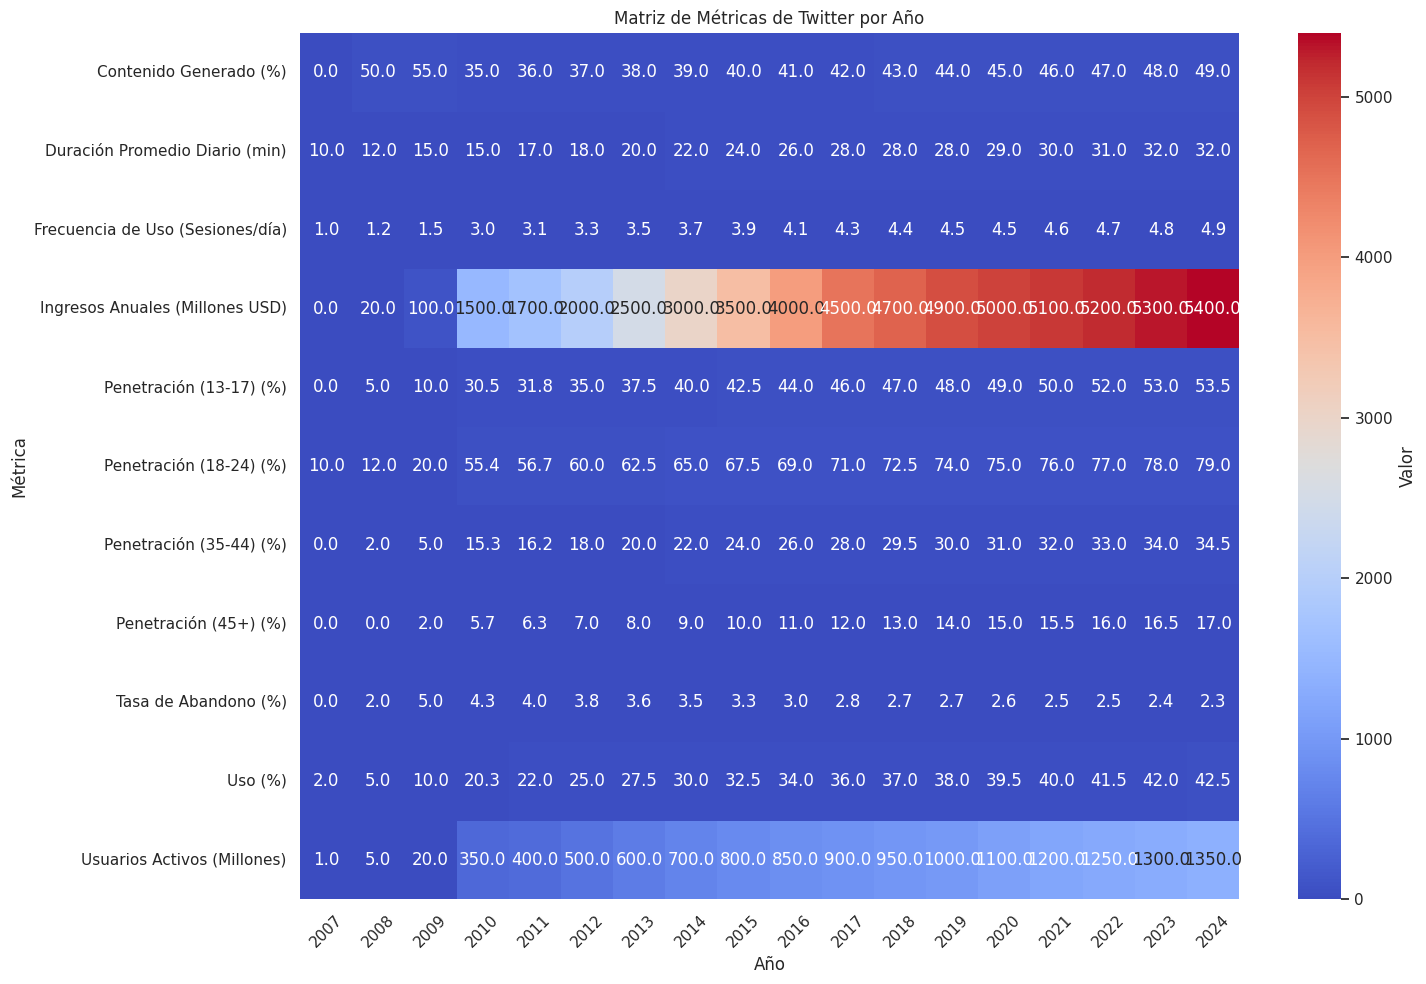

In [ ]:
# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Filtrar los datos para incluir solo Twitter
df_twitter = df[df['Red Social'] == 'Twitter']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_twitter_cleaned = df_twitter[(df_twitter[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_twitter_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de Twitter por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Whatsapp**

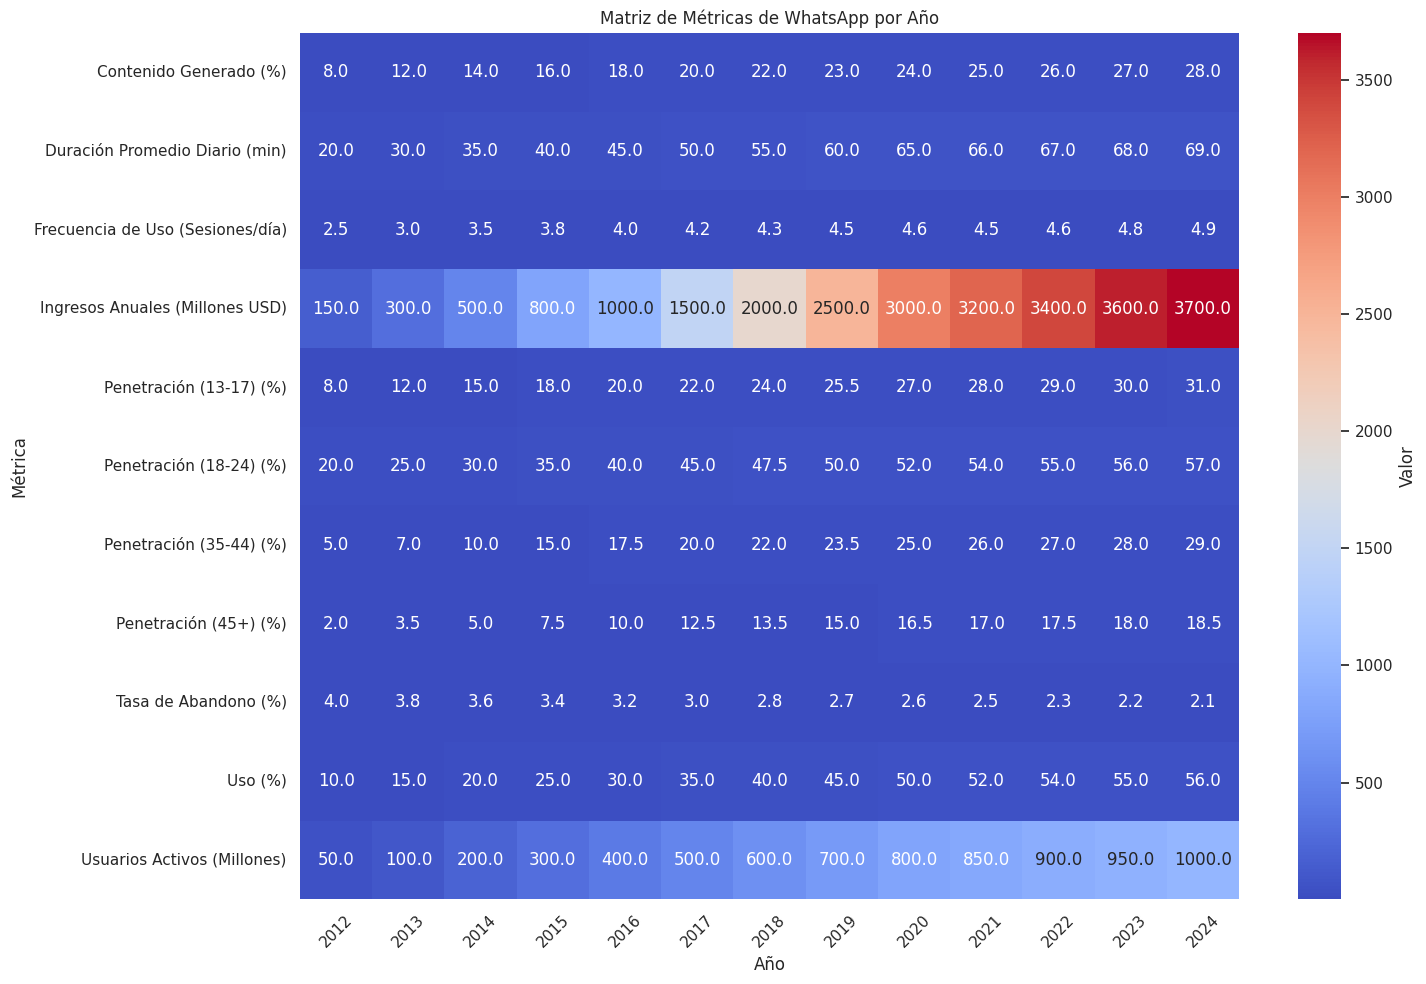

In [ ]:
# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Filtrar los datos para incluir solo WhatsApp
df_whatsapp = df[df['Red Social'] == 'WhatsApp']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_whatsapp_cleaned = df_whatsapp[(df_whatsapp[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_whatsapp_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de WhatsApp por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

# **Youtube**

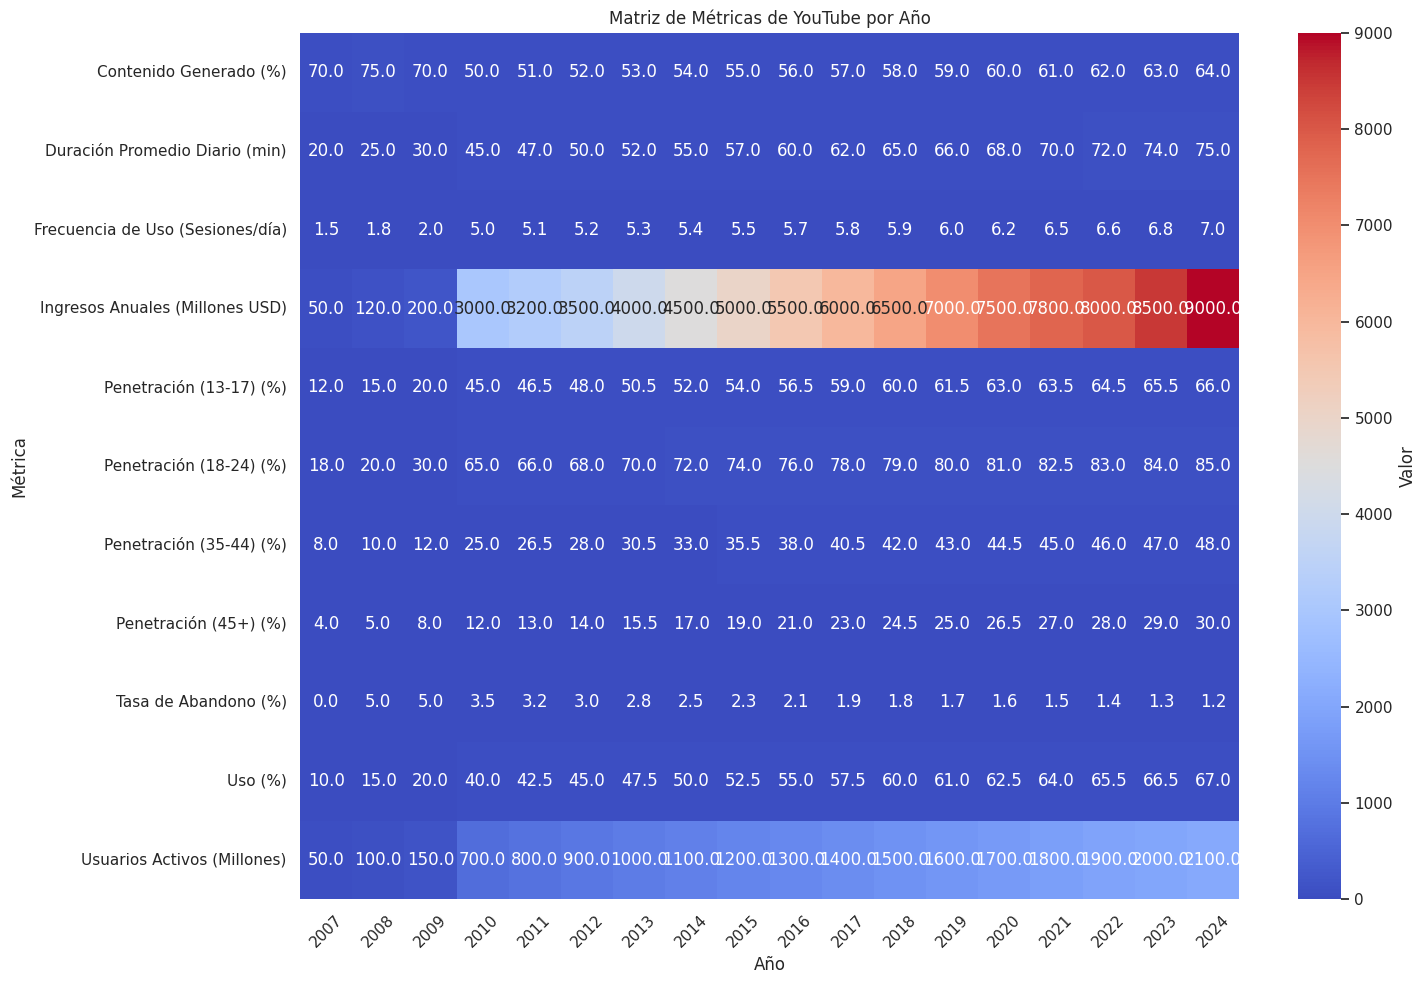

In [ ]:
# Filtrar solo las columnas que están presentes en el DataFrame
columns_to_check = [col for col in columns_to_check if col in df.columns]

# Filtrar los datos para incluir solo YouTube
df_youtube = df[df['Red Social'] == 'YouTube']

# Limpiar los datos eliminando filas con valores cero en las métricas
df_youtube_cleaned = df_youtube[(df_youtube[columns_to_check] != 0).any(axis=1)]

# Crear una tabla de matriz con melt
melted_df = df_youtube_cleaned.melt(
    id_vars=['Red Social', 'Año'],
    value_vars=columns_to_check,
    var_name='Métrica',
    value_name='Valor'
)

# Crear una tabla pivotante para la visualización
pivot_table = melted_df.pivot_table(
    index='Métrica',
    columns='Año',
    values='Valor',
    aggfunc='mean'
)

# Visualizar la tabla como un heatmap
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Valor'})
plt.title('Matriz de Métricas de YouTube por Año')
plt.xlabel('Año')
plt.ylabel('Métrica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos
plt.show()

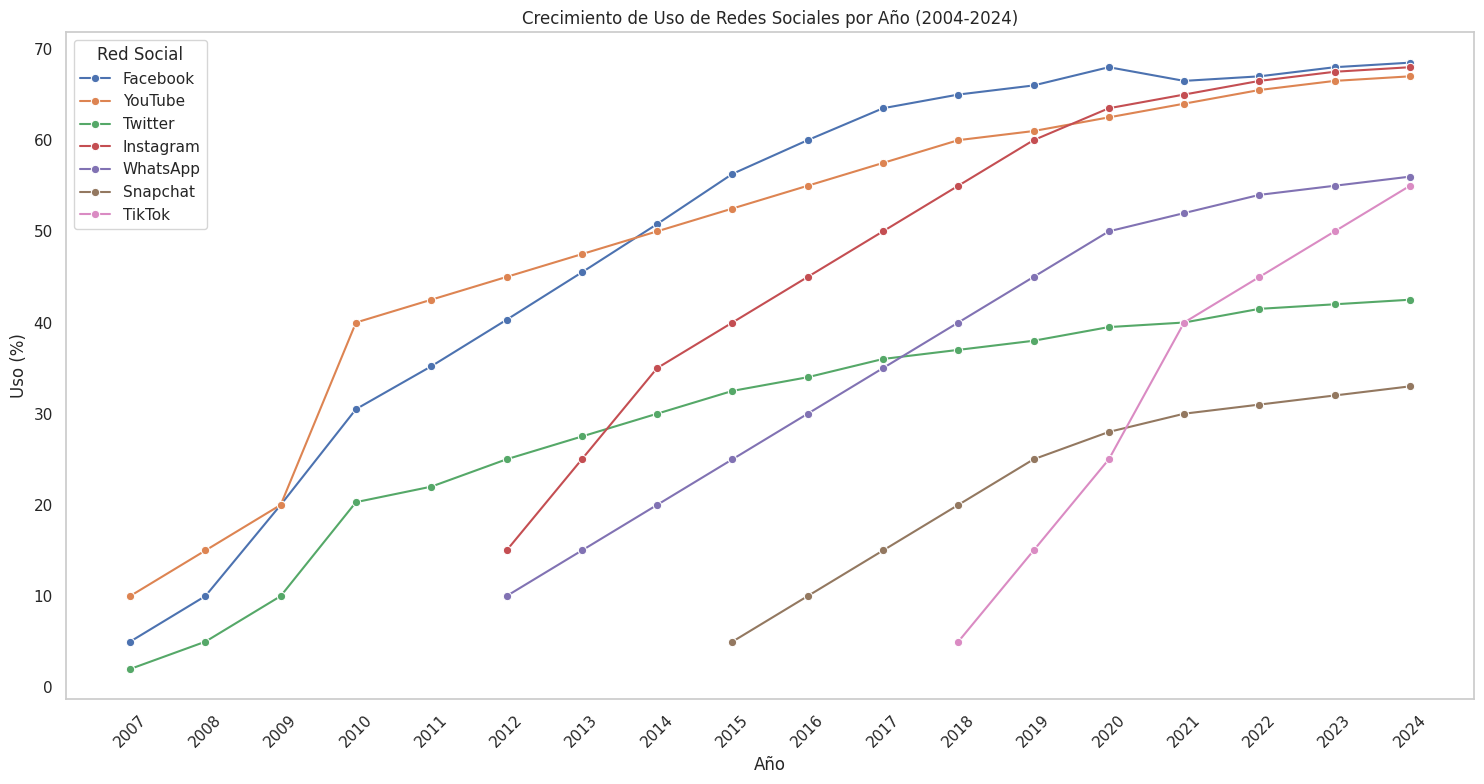

In [ ]:

# Limpiar los datos eliminando filas con valores cero en la columna de Uso (%)
df_cleaned = df[df['Uso (%)'] != 0]

# Crear un gráfico de líneas para el crecimiento de uso por año
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_cleaned, x='Año', y='Uso (%)', hue='Red Social', marker='o')

# Personalizar el gráfico
plt.title('Crecimiento de Uso de Redes Sociales por Año (2004-2024)')
plt.xlabel('Año')
plt.ylabel('Uso (%)')
plt.xticks(df_cleaned['Año'].unique(), rotation=45)  # Rotar las etiquetas del eje x
plt.legend(title='Red Social')
plt.grid()
plt.tight_layout()
plt.show()